In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/property/Emittenlist Febyola.csv
/kaggle/input/property/Property Febyola.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/property/Property Febyola.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  6 non-null      object 
 1   DER                      6 non-null      float64
 2   Operating Profit Margin  6 non-null      float64
 3   Return On Asset          6 non-null      float64
 4   Sales Growth             6 non-null      int64  
 5   Category                 0 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 416.0+ bytes


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000e+00,0.0
mean,-1.383237,0.245260,0.141790,9.280682e+08,NaN
std,5.670877,0.205069,0.318741,5.904430e+09,NaN
min,-12.915507,0.067262,-0.030777,-7.000794e+09,NaN
25%,0.500256,0.079833,-0.017563,-3.841199e+09,NaN
50%,0.707175,0.202636,0.024914,2.880824e+09,NaN
75%,0.859409,0.335348,0.063141,5.116358e+09,NaN
max,1.860299,0.580543,0.787529,7.027893e+09,NaN


In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

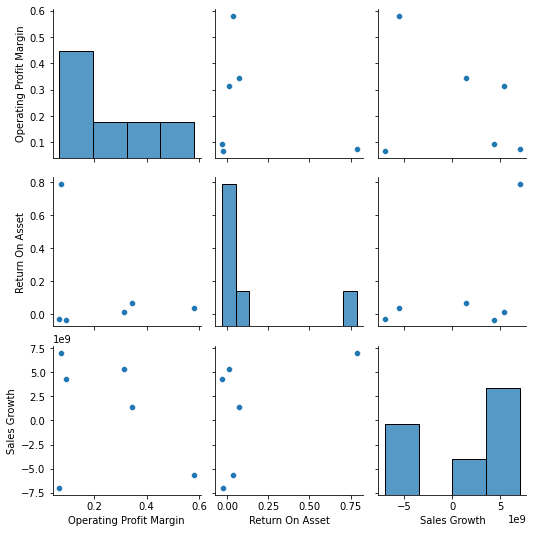

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/property/Property Febyola.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Return On Asset','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000e+00,0.0
mean,-1.383237,0.245260,0.141790,9.280682e+08,NaN
std,5.670877,0.205069,0.318741,5.904430e+09,NaN
min,-12.915507,0.067262,-0.030777,-7.000794e+09,NaN
25%,0.500256,0.079833,-0.017563,-3.841199e+09,NaN
50%,0.707175,0.202636,0.024914,2.880824e+09,NaN
75%,0.859409,0.335348,0.063141,5.116358e+09,NaN
max,1.860299,0.580543,0.787529,7.027893e+09,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

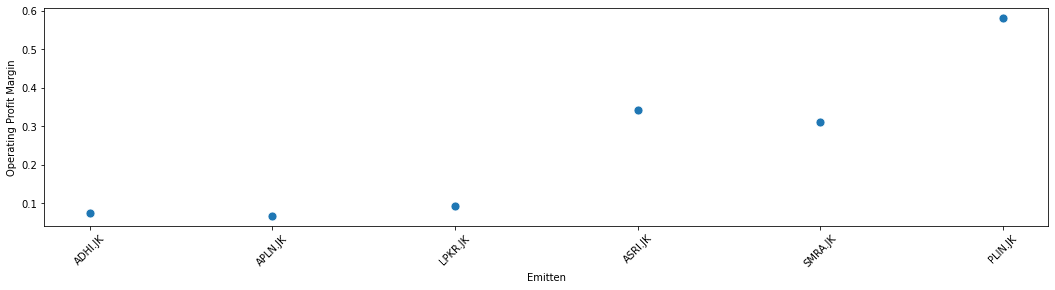

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

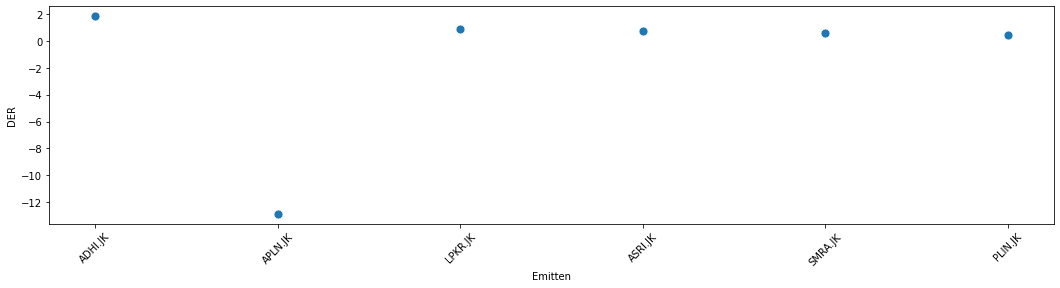

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

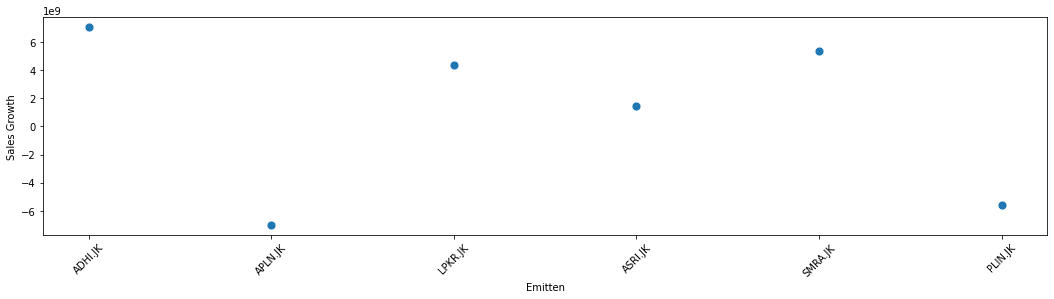

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 6
Jumlah baris setelah memfilter outlier: 6


In [12]:
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,6.000000,6.000000,6.000000,6.000000e+00,0.0
mean,-1.383237,0.245260,0.141790,9.280682e+08,NaN
std,5.670877,0.205069,0.318741,5.904430e+09,NaN
min,-12.915507,0.067262,-0.030777,-7.000794e+09,NaN
25%,0.500256,0.079833,-0.017563,-3.841199e+09,NaN
50%,0.707175,0.202636,0.024914,2.880824e+09,NaN
75%,0.859409,0.335348,0.063141,5.116358e+09,NaN
max,1.860299,0.580543,0.787529,7.027893e+09,NaN


In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,6.000000e+00,6.000000e+00,6.000000e+00
mean,6.476301e-17,-1.480297e-16,3.700743e-17
std,1.095445e+00,1.095445e+00,1.095445e+00
min,-2.227692e+00,-9.508366e-01,-1.471037e+00
25%,3.638350e-01,-8.836872e-01,-8.848391e-01
50%,4.038055e-01,-2.276921e-01,3.622935e-01
75%,4.332127e-01,4.812348e-01,7.770506e-01
max,6.265548e-01,1.791029e+00,1.131697e+00


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(6, 6)

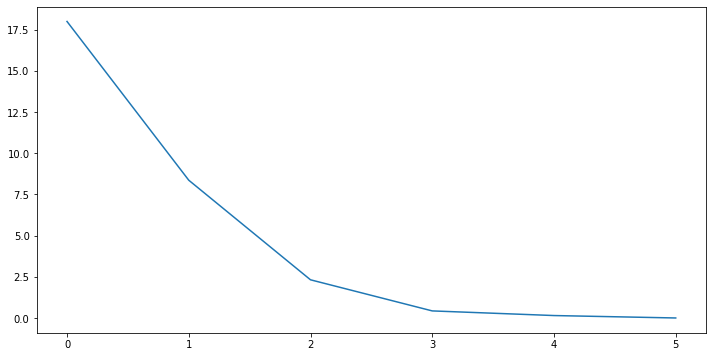

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 7):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

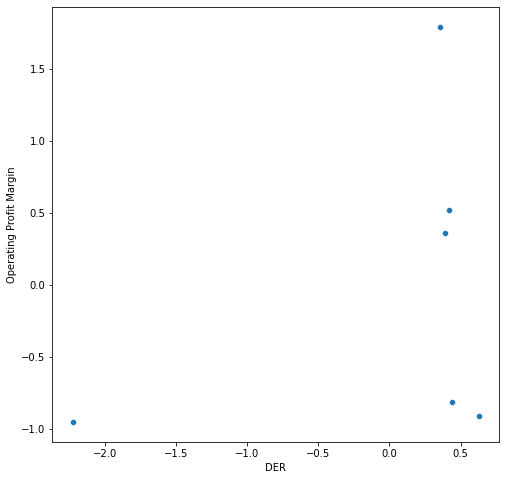

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.626555,-0.906479,1.131697,NaN,0
1,-2.227692,-0.950837,-1.471037,NaN,1
2,0.437874,-0.815311,0.630708,NaN,0
3,0.419230,0.521671,0.093879,NaN,0
4,0.388381,0.359927,0.825831,NaN,0


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,0.626555,-0.906479,1.131697,NaN,0
1,4,-2.227692,-0.950837,-1.471037,NaN,1
2,2,0.437874,-0.815311,0.630708,NaN,0
3,2,0.419230,0.521671,0.093879,NaN,0
4,2,0.388381,0.359927,0.825831,NaN,0


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       6 non-null      int64  
 1   DER (St.)                      6 non-null      float64
 2   Operating Profit Margin (St.)  6 non-null      float64
 3   Sales Growth (St.)             6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 320.0 bytes


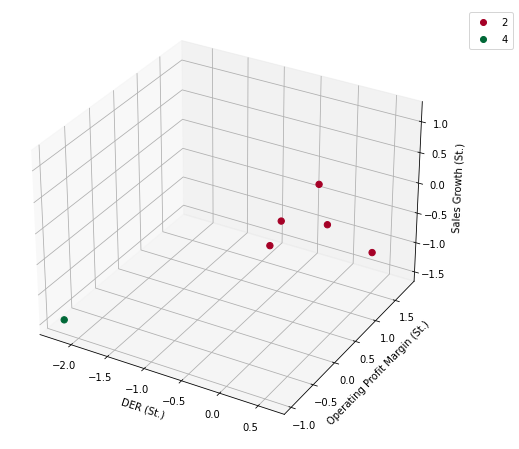

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

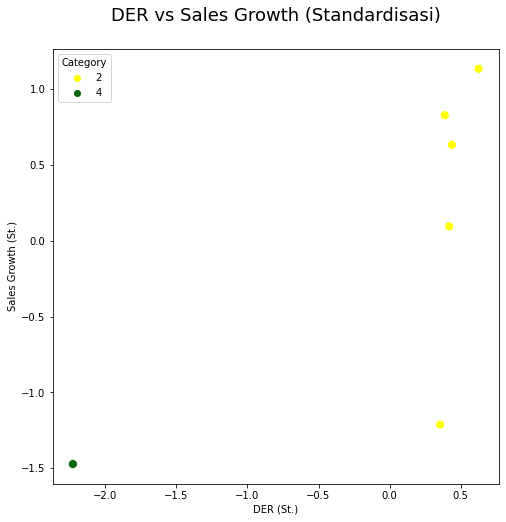

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

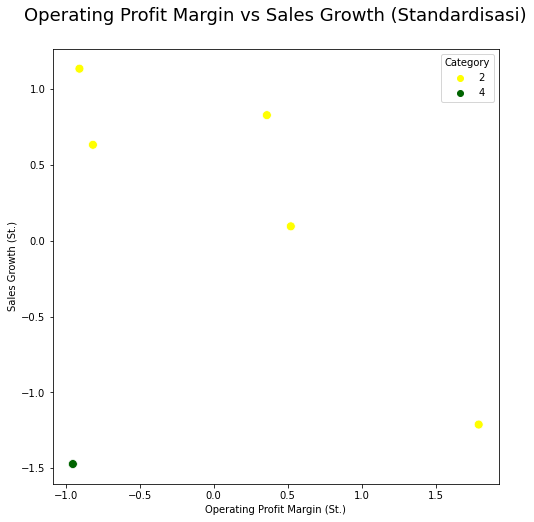

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

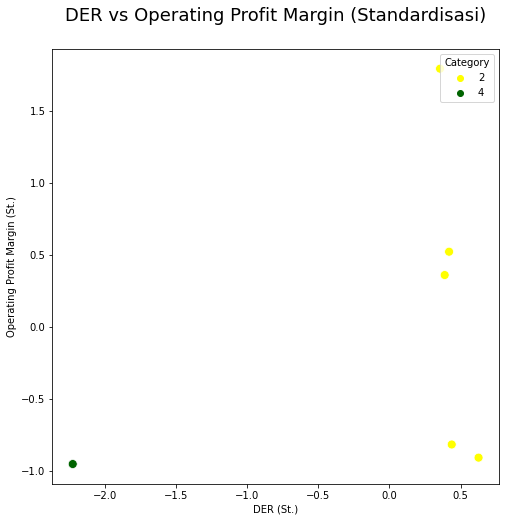

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [27]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category"
         ], axis=1, inplace=True)

In [28]:
dftemp = pd.read_csv('../input/property/Emittenlist Febyola.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(6)

,Industry;Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return On Asset,Sales Growth
0,Keuangan;PT Adhi Karya (Persero) Tbk (ADHI.JK),2,0.626555,-0.906479,1.131697,ADHI.JK,1.860299,0.075566,0.787529,7027892965
1,Keuangan;PT Agung Podomoro Land Tbk (APLN.JK),4,-2.227692,-0.950837,-1.471037,APLN.JK,-12.915507,0.067262,-0.027559,-7000793514
2,Keuangan;PT Lippo Karawaci Tbk (LPKR.JK),2,0.437874,-0.815311,0.630708,LPKR.JK,0.883538,0.092633,-0.030777,4327576000
3,Keuangan;PT Alam Sutera Realty Tbk (ASRI.JK),2,0.419230,0.521671,0.093879,ASRI.JK,0.787023,0.342917,0.071720,1434071756
4,Keuangan;PT Summarecon Agung Tbk (SMRA.JK),2,0.388381,0.359927,0.825831,SMRA.JK,0.627327,0.312639,0.012427,5379284786
5,Keuangan;PT Plaza Indonesia Realty Tbk (PLIN.JK),2,0.355653,1.791029,-1.211078,PLIN.JK,0.457899,0.580543,0.037401,-5599623067


In [29]:
df.to_csv('result.csv', index = False)

In [30]:
kmeans.cluster_centers_

array([[ 0.44553847,  0.19016731,  0.29420731],
       [-2.22769235, -0.95083656, -1.47103655]])

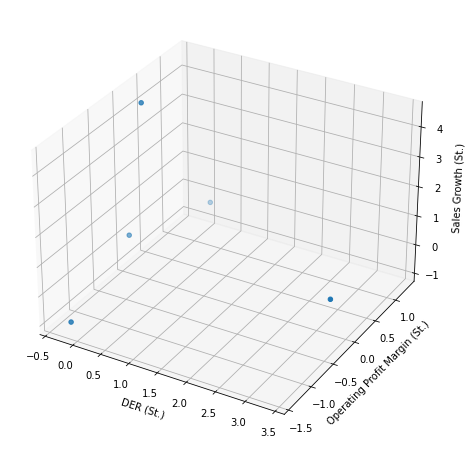

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

In [32]:
df[df['Category'] == 4].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00
mean,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09
25%,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09
50%,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09
75%,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09
max,4.0,-2.227692,-0.950837,-1.471037,-12.915507,0.067262,-0.027559,-7.000794e+09


In [33]:
#Highly Positively Impacted
df[df['Category'] == 3].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 2].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,2.0,0.445538,0.190167,0.294207,0.923217,0.280859,0.175660,2.513840e+09
std,0.0,0.105906,1.108500,0.922397,0.548251,0.207513,0.344080,4.971702e+09
min,2.0,0.355653,-0.906479,-1.211078,0.457899,0.075566,-0.030777,-5.599623e+09
25%,2.0,0.388381,-0.815311,0.093879,0.627327,0.092633,0.012427,1.434072e+09
50%,2.0,0.419230,0.359927,0.630708,0.787023,0.312639,0.037401,4.327576e+09
75%,2.0,0.437874,0.521671,0.825831,0.883538,0.342917,0.071720,5.379285e+09
max,2.0,0.626555,1.791029,1.131697,1.860299,0.580543,0.787529,7.027893e+09


In [35]:
#Highly Positively Impacted
df[df['Category'] == 1].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Highly Positively Impacted
df[df['Category'] == 0].describe() 

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return On Asset,Sales Growth
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
